# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.999930e+01     8.447735e+00
 * time: 0.0044329166412353516
     1     2.836601e+01     5.593428e+00
 * time: 0.013020992279052734
     2     2.613151e+01     1.214408e+01
 * time: 0.03302884101867676
     3     1.526408e+01     4.333388e+00
 * time: 0.05626487731933594
     4     1.231128e+01     1.958364e+00
 * time: 0.07596588134765625
     5     1.210035e+01     3.343874e+00
 * time: 0.13607192039489746
     6     1.070339e+01     1.399170e+00
 * time: 0.1519608497619629
     7     1.024522e+01     2.009187e+00
 * time: 0.16742777824401855
     8     1.005408e+01     2.114012e+00
 * time: 0.17870688438415527
     9     9.629335e+00     1.066451e+00
 * time: 0.1938488483428955
    10     9.260806e+00     9.438445e-01
 * time: 0.20849895477294922
    11     8.999708e+00     7.178494e-01
 * time: 0.22348499298095703
    12     8.914357e+00     1.117408e+00
 * time: 0.2349228858947754
    13     8.791633e+00     6.319079e-01
 * time:

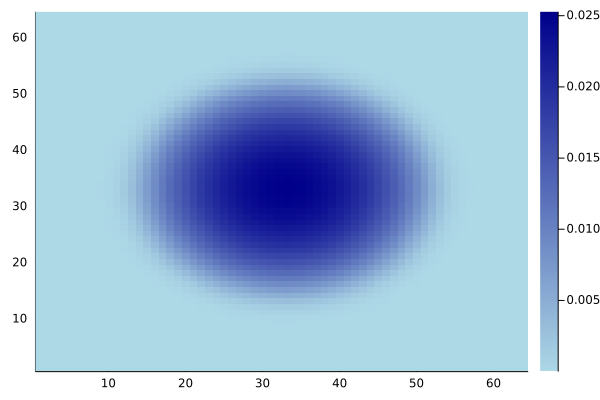

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)